In [23]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, precision_score, recall_score

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Load all data
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

In [26]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [27]:
# we need to first create the user-item rating matrix
user_item_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')
# fill unrated movies with 0
user_item_matrix = user_item_matrix.fillna(0)
user_item_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Now we compute User-User Similarity using cosine similarity
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
user_similarity_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


In [29]:
# Select an example user to try the algorithm
example_user_id = 1

# Get the similarity scores for the example user
sim_scores = user_similarity_df.loc[example_user_id]
sim_scores

,1
userId,
1,1.000000
2,0.027283
3,0.059720
4,0.194395
5,0.129080
...,...
606,0.164191
607,0.269389
608,0.291097


In [30]:
# Exclude the example user from the list (similarity with self is 1 so we do not need it)
sim_scores = sim_scores.drop(labels=[example_user_id])
sim_scores

,1
userId,
2,0.027283
3,0.059720
4,0.194395
5,0.129080
6,0.128152
...,...
606,0.164191
607,0.269389
608,0.291097


In [31]:
# Get the top 5 most similar users
top_5_similar_users = sim_scores.sort_values(ascending=False).head(5).index
top_5_similar_users

Index([266, 313, 368, 57, 91], dtype='int64', name='userId')

In [32]:
# Get the ratings from the top 5 similar users
similar_users_ratings = user_item_matrix.loc[top_5_similar_users]
similar_users_ratings

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
266,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
313,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,4.0,3.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Calculate weighted ratings for the 5 users
weighted_ratings = similar_users_ratings.T.dot(sim_scores[top_5_similar_users])
# Normalize by the sum of similarities of the 5 similar users
weighted_ratings = weighted_ratings / sim_scores[top_5_similar_users].sum()
weighted_ratings

,0
movieId,
1,2.179472
2,0.579160
3,1.176315
4,0.000000
5,0.000000
...,...
193581,0.000000
193583,0.000000
193585,0.000000


In [34]:
# Get movies rated by the example user
example_user_movies = user_item_matrix.loc[example_user_id]
example_user_movies = example_user_movies[example_user_movies > 0].index.tolist() # Exclude unrated movies
print("size: ", len(example_user_movies))
print(example_user_movies[:5]) # Check first 5

# Exclude movies already rated by the example user for a fairer trial
weighted_ratings = weighted_ratings.drop(labels=example_user_movies)

size:  232
[1, 3, 6, 47, 50]


In [35]:
# Recommend the top movies
top_n = 5
recommendations = weighted_ratings.sort_values(ascending=False).head(top_n)
recommended_movie_ids = recommendations.index.tolist()
recommended_movie_ids

[1200, 1610, 541, 589, 1036]

In [36]:
# Get movie titles
recommended_movies = movies[movies['movieId'].isin(recommended_movie_ids)]
print("Recommended Movies for User {}: \n{}".format(example_user_id, recommended_movies[['movieId', 'title']]))

Recommended Movies for User 1: 
      movieId                              title
474       541                Blade Runner (1982)
507       589  Terminator 2: Judgment Day (1991)
793      1036                    Die Hard (1988)
902      1200                      Aliens (1986)
1211     1610   Hunt for Red October, The (1990)


In [37]:
# Define a function to calculate precision and recall for a user
def precision_recall_at_k(user_id, k, threshold=4.0):
    # Split the data into train and test sets
    train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)
    user_train_data = train_data[train_data['userId'] == user_id]
    user_test_data = test_data[test_data['userId'] == user_id]

    # Re-create the user-item matrix with training data
    train_user_item_matrix = train_data.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

    # Recompute similarity matrix with training data
    train_user_similarity = cosine_similarity(train_user_item_matrix)
    train_user_similarity_df = pd.DataFrame(train_user_similarity, index=train_user_item_matrix.index, columns=train_user_item_matrix.index)

    # Get similarity scores for the user
    sim_scores = train_user_similarity_df.loc[user_id]
    sim_scores = sim_scores.drop(labels=[user_id])
    top_k_users = sim_scores.sort_values(ascending=False).head(k).index

    # Aggregate ratings
    similar_users_ratings = train_user_item_matrix.loc[top_k_users]
    weighted_ratings = similar_users_ratings.T.dot(sim_scores[top_k_users])
    weighted_ratings = weighted_ratings / sim_scores[top_k_users].sum()
    weighted_ratings = weighted_ratings.drop(labels=user_train_data['movieId'], errors='ignore')

    # Get top-N recommendations (e.g., N=10)
    N = 10
    top_recommendations = weighted_ratings.sort_values(ascending=False).head(N)

    # Relevant movies in test data
    relevant_movies = user_test_data[user_test_data['rating'] >= threshold]['movieId']
    recommended_movies = top_recommendations.index

    # Calculate Precision and Recall
    true_positives = set(recommended_movies).intersection(set(relevant_movies))
    precision = len(true_positives) / len(recommended_movies) if len(recommended_movies) > 0 else 0
    recall = len(true_positives) / len(relevant_movies) if len(relevant_movies) > 0 else 0

    return precision, recall

# Calculate precision and recall for the example user
precision, recall = precision_recall_at_k(example_user_id, k=5)
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

Precision: 0.20
Recall: 0.06


In [38]:
# compute item-user similarity using pearson correlation
# Create an item-user matrix
item_user_matrix = ratings.pivot_table(index='movieId', columns='userId', values='rating')
item_user_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Get user-user correlation matrix
item_similarity_df = item_user_matrix.corr(method='pearson', min_periods=10)
item_similarity_df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,0.207983,0.268749,-0.291636,-0.118773,0.469668,NaN,NaN,...,0.091574,-1.597727e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,NaN,-0.032086
2,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.387347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.623288
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,NaN,NaN,NaN,...,-0.222113,3.966413e-01,0.090090,NaN,0.400124,0.144603,0.116518,-0.170501,NaN,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,NaN,0.028347,NaN,NaN,...,NaN,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.066378,NaN,NaN,0.144603,0.244321,-0.049192,0.137771,0.253582,0.572700,-0.382955,...,0.290490,1.406134e-01,0.318473,0.682949,0.167062,1.000000,0.114191,0.240842,0.533002,0.389185
607,0.174557,NaN,NaN,0.116518,0.231080,0.255639,0.402792,0.251280,NaN,NaN,...,0.698241,2.172105e-01,0.192787,0.035806,-0.299641,0.114191,1.000000,0.200814,0.190117,0.106605
608,0.268070,NaN,NaN,-0.170501,-0.020546,0.125428,0.008081,0.434423,0.336625,-0.571043,...,0.473967,2.976461e-01,0.086423,0.053986,-0.075673,0.240842,0.200814,1.000000,0.488929,0.147606


In [40]:
# Select an example movie to recommend similar movies
example_movie_id = 3

# Get the similarity scores for the example movie just like we did with the users
item_sim_scores = item_similarity_df[example_movie_id].dropna()
# Exclude the example movie from the list
item_sim_scores = item_sim_scores.drop(labels=[example_movie_id])

# Get the top 5 most similar movies
top_5_similar_movies = item_sim_scores.sort_values(ascending=False).head(5).index

In [41]:
# Get movie titles
similar_movies = movies[movies['movieId'].isin(top_5_similar_movies)]
print("Movies similar to '{}': \n{}".format(
    movies[movies['movieId'] == example_movie_id]['title'].values[0],
    similar_movies[['movieId', 'title']]
))

Movies similar to 'Grumpier Old Men (1995)': 
     movieId                     title
236      274   Man of the House (1995)
337      380          True Lies (1994)
358      414  Air Up There, The (1994)
515      599    Wild Bunch, The (1969)


### Visualize item similarity

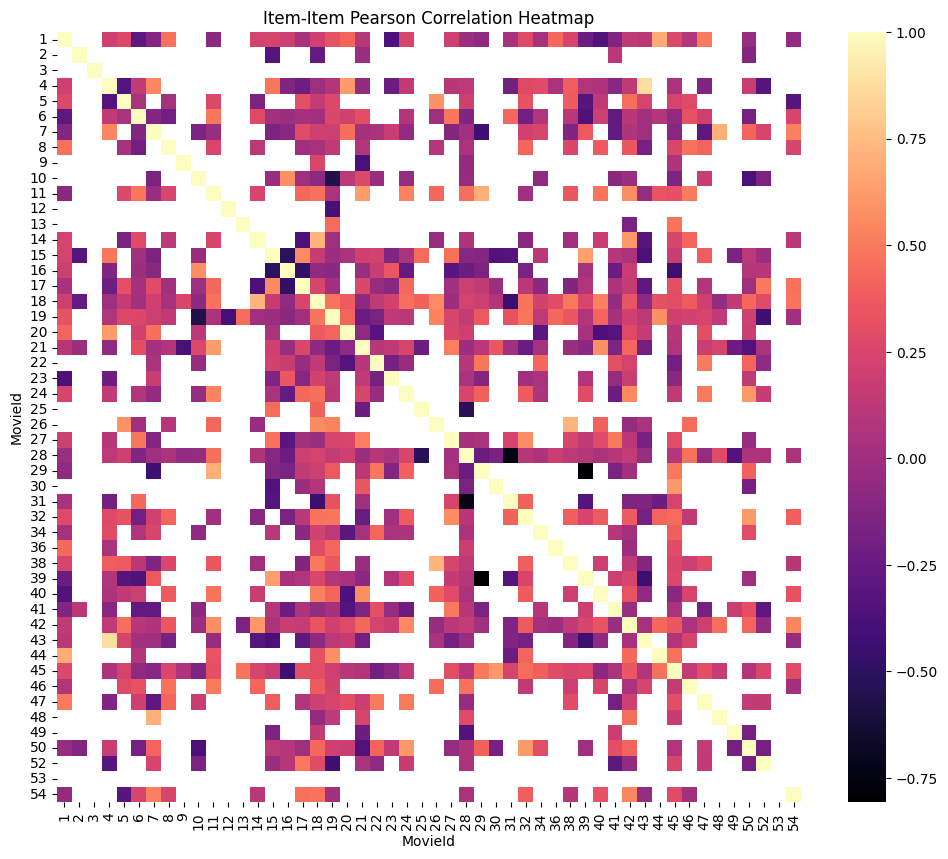

In [42]:
# Select a subset of movies (first 50 movies)
subset_movie_ids = movies['movieId'].head(50)
subset_similarity = item_similarity_df.loc[subset_movie_ids, subset_movie_ids]

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(subset_similarity, cmap='magma')
plt.title('Item-Item Pearson Correlation Heatmap')
plt.xlabel('MovieId')
plt.ylabel('MovieId')
plt.show()

### Compare models

User-Based Collaborative Filtering

In [43]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

# Create user-item matrix for training data
train_user_item_matrix = train_data.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# Compute similarity matrix on training data
train_user_similarity = cosine_similarity(train_user_item_matrix)
train_user_similarity_df = pd.DataFrame(train_user_similarity, index=train_user_item_matrix.index, columns=train_user_item_matrix.index)

# Predict ratings for the test set
def predict_rating_user_based(user_id, movie_id):
    if movie_id in train_user_item_matrix.columns:
        # Get similar users
        sim_scores = train_user_similarity_df.loc[user_id]
        sim_scores = sim_scores.drop(labels=[user_id])
        user_ratings = train_user_item_matrix[movie_id]
        # Only consider users who have rated the movie
        relevant_users = user_ratings[user_ratings > 0].index
        sim_scores = sim_scores[relevant_users]
        user_ratings = user_ratings[relevant_users]
        if not sim_scores.empty:
            # Weighted sum
            rating = np.dot(sim_scores, user_ratings) / sim_scores.sum()
            return rating
    return train_user_item_matrix.loc[user_id].mean()

# Apply the prediction function to the test set
test_data['predicted_rating_user'] = test_data.apply(lambda row: predict_rating_user_based(row['userId'], row['movieId']), axis=1)

test_data.fillna(0, inplace=True)

# Calculate MAE
mae_user = mean_absolute_error(test_data['rating'], test_data['predicted_rating_user'])
print("User-Based CF MAE: {:.4f}".format(mae_user))

User-Based CF MAE: 0.8387


Item-Based Collaborative Filtering

In [44]:
# Compute similarity matrix on training data for items
train_item_user_matrix = train_data.pivot_table(index='movieId', columns='userId', values='rating').fillna(0)
train_item_similarity_df = train_item_user_matrix.corr(method='pearson', min_periods=10)

# Predict ratings for the test set
def predict_rating_item_based(user_id, movie_id):
    try:
        # Ensure the movie_id is in train_item_similarity_df
        if movie_id in train_item_user_matrix.index:
            if movie_id in train_item_similarity_df.columns:
                # Get similarity scores
                sim_scores = train_item_similarity_df[movie_id].drop(labels=[movie_id], errors='ignore').dropna()
                # Check if the user has rated any items
                if user_id in train_item_user_matrix.columns:
                    user_ratings = train_item_user_matrix.loc[:, user_id]
                    user_ratings = user_ratings[user_ratings > 0]
                    sim_scores = sim_scores[user_ratings.index]
                    if not sim_scores.empty:
                        # Weighted sum
                        rating = np.dot(sim_scores, user_ratings) / sim_scores.abs().sum()
                        return rating
        # Fallback in case we do not haverating so we get average rating for the movie if available
        return train_item_user_matrix.loc[movie_id].mean() if movie_id in train_item_user_matrix.index else 0
    except KeyError as e:
        pass


# Apply the prediction function to the test set
test_data['predicted_rating_item'] = test_data.apply(lambda row: predict_rating_item_based(row['userId'], row['movieId']), axis=1)
test_data.fillna(0, inplace=True)
# Calculate MAE
mae_item = mean_absolute_error(test_data['rating'], test_data['predicted_rating_item'])
print("Item-Based CF MAE: {:.4f}".format(mae_item))

Item-Based CF MAE: 3.2694


In [45]:
# Generate table for report
summary_table = pd.DataFrame({
    'Model': ['User-Based CF', 'Item-Based CF'],
    'MAE': [mae_user, mae_item]
})
summary_table

,Model,MAE
0,User-Based CF,0.838663
1,Item-Based CF,3.269363
